<a href="https://colab.research.google.com/github/bbchen33/Deep-learning/blob/master/Tensorflow-small-image-cifar10-training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(X_train.shape)
print(X_test.shape)

Using TensorFlow backend.


(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

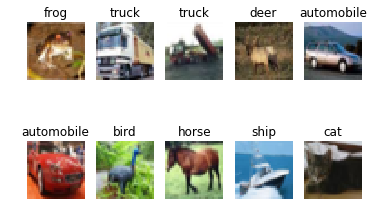

In [4]:
for i in range(10):
  plt.subplot(2,5,i+1)  
  plt.imshow(X_train[i,:,:,:])
  plt.title(labels[int(y_train[i])])
  plt.axis('off')

In [5]:
print(X_train.max())
print(X_train.min())
X_train_normal = X_train/255
print(X_train_normal.max())


255
0
1.0


In [0]:
X_test_normal = X_test/255

Reshape the features to 1 dimension

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),    
    tf.keras.layers.Dense(10, activation = 'softmax')    
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
y_train_category = tf.keras.utils.to_categorical(y_train, 10)
y_test_category = tf.keras.utils.to_categorical(y_test, 10)

In [9]:
print(y_train_category[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train_category, batch_size = 128, epochs = 15, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 3s 76us/sample - loss: 31.8789 - acc: 0.1954 - val_loss: 2.4941 - val_acc: 0.2503
Epoch 2/15
40000/40000 [==============================] - 3s 69us/sample - loss: 2.2895 - acc: 0.2815 - val_loss: 2.2654 - val_acc: 0.2705
Epoch 3/15
40000/40000 [==============================] - 3s 69us/sample - loss: 1.9997 - acc: 0.3174 - val_loss: 1.9107 - val_acc: 0.3339
Epoch 4/15
40000/40000 [==============================] - 3s 69us/sample - loss: 1.8890 - acc: 0.3406 - val_loss: 1.9287 - val_acc: 0.3216
Epoch 5/15
40000/40000 [==============================] - 3s 70us/sample - loss: 1.8359 - acc: 0.3575 - val_loss: 1.8924 - val_acc: 0.3403
Epoch 6/15
40000/40000 [==============================] - 3s 70us/sample - loss: 1.7564 - acc: 0.3780 - val_loss: 1.8207 - val_acc: 0.3488
Epoch 7/15
40000/40000 [==============================] - 3s 69us/sample - loss: 1.7435 - acc: 0.3825 - val_loss: 1

In [0]:
def training_progress(model, history):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['acc'], label = 'train_accuracy')
  plt.plot(history.history['val_acc'], label = 'val_accuracy')
  plt.title('Accuracy')
  plt.legend()
  
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.title('Loss')  
  plt.legend()
  plt.show()

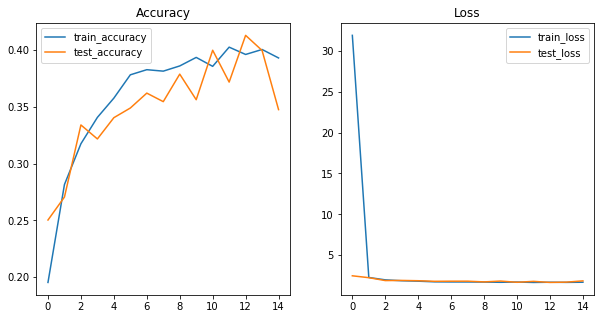

10000/10000 [==============================] - 1s 105us/sample - loss: 1.8522 - acc: 0.3550
Trained with dense layers gives test accuracy of: 0.355


In [12]:
training_progress(model, history)
print('Trained with dense layers gives test accuracy of:',model.evaluate(X_test, y_test_category)[1])

The model trained with only dense layers did not seem to be able to give good accuracy.

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train_category, batch_size = 128, epochs = 15, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 11s 270us/sample - loss: 27.5287 - acc: 0.3759 - val_loss: 1.4574 - val_acc: 0.4937
Epoch 2/15
40000/40000 [==============================] - 8s 198us/sample - loss: 1.1822 - acc: 0.5889 - val_loss: 1.5045 - val_acc: 0.4948
Epoch 3/15
40000/40000 [==============================] - 8s 199us/sample - loss: 0.8088 - acc: 0.7212 - val_loss: 1.4096 - val_acc: 0.5543
Epoch 4/15
40000/40000 [==============================] - 8s 197us/sample - loss: 0.4858 - acc: 0.8399 - val_loss: 1.6056 - val_acc: 0.5475
Epoch 5/15
40000/40000 [==============================] - 8s 203us/sample - loss: 0.2643 - acc: 0.9156 - val_loss: 1.8036 - val_acc: 0.5584
Epoch 6/15
40000/40000 [==============================] - 8s 200us/sample - loss: 0.1438 - acc: 0.9589 - val_loss: 2.1677 - val_acc: 0.5555
Epoch 7/15
40000/40000 [==============================] - 8s 198us/sample - loss: 0.0950 - acc: 0.9743 - val

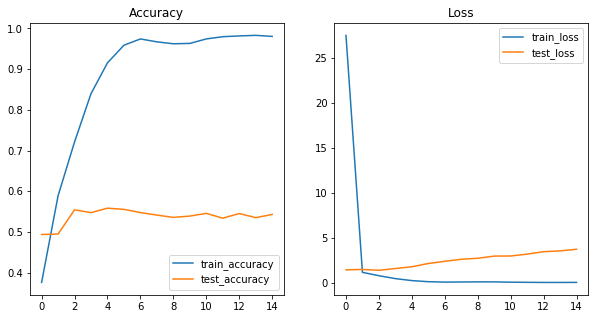

10000/10000 [==============================] - 2s 182us/sample - loss: 3.8856 - acc: 0.5327
Trained with CNN gives test accuracy of: 0.5327


In [19]:
training_progress(model, history)
print('Trained with CNN gives test accuracy of:',model.evaluate(X_test, y_test_category)[1])

The accuracy for the train set is very good but not good for the test set. It's clear that the model is overfitting the training data.

In [0]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model3.fit(X_train, y_train_category, batch_size = 128, epochs = 5, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 10s 241us/sample - loss: 30.2567 - acc: 0.3006 - val_loss: 1.6611 - val_acc: 0.4291
Epoch 2/5
40000/40000 [==============================] - 9s 227us/sample - loss: 1.5286 - acc: 0.4616 - val_loss: 1.4378 - val_acc: 0.4997
Epoch 3/5
40000/40000 [==============================] - 9s 221us/sample - loss: 1.3346 - acc: 0.5323 - val_loss: 1.4507 - val_acc: 0.5075
Epoch 4/5
40000/40000 [==============================] - 9s 223us/sample - loss: 1.1975 - acc: 0.5803 - val_loss: 1.3621 - val_acc: 0.5387
Epoch 5/5
40000/40000 [==============================] - 9s 224us/sample - loss: 1.0649 - acc: 0.6287 - val_loss: 1.3823 - val_acc: 0.5396


Adding complexity to the model to see if it can improve the learning.

In [0]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(100, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2), 
    
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model4.fit(X_train, y_train_category, batch_size = 128, epochs = 5, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 9s 217us/sample - loss: 2.3747 - acc: 0.2133 - val_loss: 1.8374 - val_acc: 0.3215
Epoch 2/5
40000/40000 [==============================] - 8s 201us/sample - loss: 1.7581 - acc: 0.3467 - val_loss: 1.5491 - val_acc: 0.4410
Epoch 3/5
40000/40000 [==============================] - 8s 201us/sample - loss: 1.5772 - acc: 0.4251 - val_loss: 1.4089 - val_acc: 0.4999
Epoch 4/5
40000/40000 [==============================] - 8s 199us/sample - loss: 1.4464 - acc: 0.4788 - val_loss: 1.3403 - val_acc: 0.5195
Epoch 5/5
40000/40000 [==============================] - 8s 201us/sample - loss: 1.3657 - acc: 0.5112 - val_loss: 1.2396 - val_acc: 0.5715


Now the validation score is better than the training set. That means our model is not just memorizing the dataset. Now I can try the same model with more epochs to see if it reaches a better accuracy for the test set.

In [25]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model4.fit(X_train, y_train_category, batch_size = 128, epochs = 15, validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 8s 209us/sample - loss: 1.3067 - acc: 0.5354 - val_loss: 1.2036 - val_acc: 0.5883
Epoch 2/15
40000/40000 [==============================] - 8s 201us/sample - loss: 1.2229 - acc: 0.5625 - val_loss: 1.1302 - val_acc: 0.6086
Epoch 3/15
40000/40000 [==============================] - 8s 201us/sample - loss: 1.1648 - acc: 0.5846 - val_loss: 1.1183 - val_acc: 0.6189
Epoch 4/15
40000/40000 [==============================] - 8s 201us/sample - loss: 1.1154 - acc: 0.6075 - val_loss: 1.0715 - val_acc: 0.6361
Epoch 5/15
40000/40000 [==============================] - 8s 202us/sample - loss: 1.0841 - acc: 0.6189 - val_loss: 1.0849 - val_acc: 0.6296
Epoch 6/15
40000/40000 [==============================] - 8s 204us/sample - loss: 1.0422 - acc: 0.6324 - val_loss: 1.0005 - val_acc: 0.6619
Epoch 7/15
40000/40000 [==============================] - 8s 204us/sample - loss: 1.0229 - acc: 0.6388 - val_l

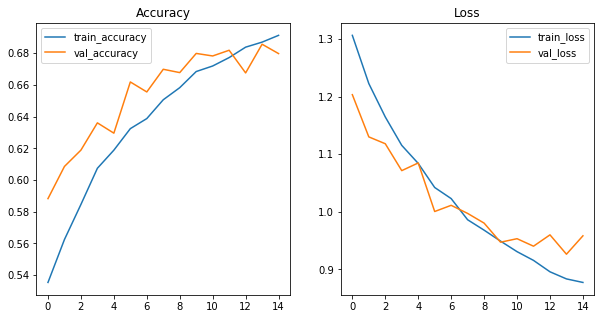

10000/10000 [==============================] - 2s 193us/sample - loss: 0.9601 - acc: 0.6796
Trained with CNN gives test accuracy of: 0.6796


In [26]:
training_progress(model4, history)
print('Trained with CNN gives test accuracy of:',model4.evaluate(X_test, y_test_category)[1])